## 1. Project Overview

#### This project investigates a dataset containing individuals' height, weight, gender, and shoe size. The primary objective is to determine whether the features in the dataset (height, weight, and gender) are sufficient to accurately predict shoe size. Additionally, the project aims to evaluate the performance of a regression model applied to this dataset, assessing its potential for developing a reliable predictive model based on feature selection.
#### The evaluation metrics used to measure the model's effectiveness include:
#### 1.	Mean Squared Error (MSE)
#### 2.	Mean Absolute Error (MAE)
#### 3.	R² Score


## 2. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 3. Load Dataset

In [7]:
df = pd.read_csv(r'C:\Users\12042\OneDrive\Documents\Dunni\Data Analysis\DA Projects\Python Projects\Shoe_Size.csv') 

## 4. Overview of the Dataset

In [8]:
# A quick view of the first 5 rows
df.head()

,Hight,Weight,Shoe size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M


In [9]:
# A quick view of the last 5 rows
df.tail()

,Hight,Weight,Shoe size,Gender
104,166,140.0,41,F
105,190,105.0,42,F
106,186,118.0,43,M
107,168,123.0,42,M
108,183,96.0,40,F


In [10]:
# checking for the shape of the dataset
df.shape

(109, 4)

In [11]:
# Summary information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hight      109 non-null    int64  
 1   Weight     109 non-null    float64
 2   Shoe size  109 non-null    int64  
 3   Gender     109 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [12]:
# Summary information of the numerical variables
df.describe()

,Hight,Weight,Shoe size
count,109.000000,109.000000,109.000000
mean,173.403670,95.887156,40.743119
std,13.581114,30.423234,1.771187
min,140.000000,49.000000,36.000000
25%,164.000000,68.000000,39.000000
50%,174.000000,95.000000,41.000000
75%,185.000000,118.000000,42.000000
max,197.000000,159.000000,44.000000


## 5. Data Preprocessing

### 5.1 Data Cleaning

In [13]:
# Checking for duplicates
df.duplicated(keep=False).sum()

2

In [14]:
# Finding the duplicate rows
duplicates = df[df.duplicated(keep=False)]

In [15]:
# Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
    Hight  Weight  Shoe size Gender
51    190    95.0         42      M
55    190    95.0         42      M


In [16]:
# Dropping duplicate row
df.drop_duplicates(inplace = True)

In [17]:
# Checking for the shape of the dataset
df.shape

(108, 4)

In [18]:
# Checking for the first 5 rows
df.head()

,Hight,Weight,Shoe size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M


In [19]:
# Renaming Hight and Shoe size columns
df = df.rename(columns= {'Hight' : 'Height', 'Shoe size': 'Shoe Size'})

In [20]:
# Replacing 'F' and 'M' values
df['Gender'].replace({'F': 'Female', 'M': 'Male'}, inplace = True )

In [21]:
df

,Height,Weight,Shoe Size,Gender
0,180,79.0,42,Male
1,165,65.0,41,Male
2,178,72.0,42,Male
3,160,53.0,43,Male
4,182,78.0,36,Male
...,...,...,...,...
104,166,140.0,41,Female
105,190,105.0,42,Female
106,186,118.0,43,Male
107,168,123.0,42,Male


### 5.2 Exploratory Data Analysis

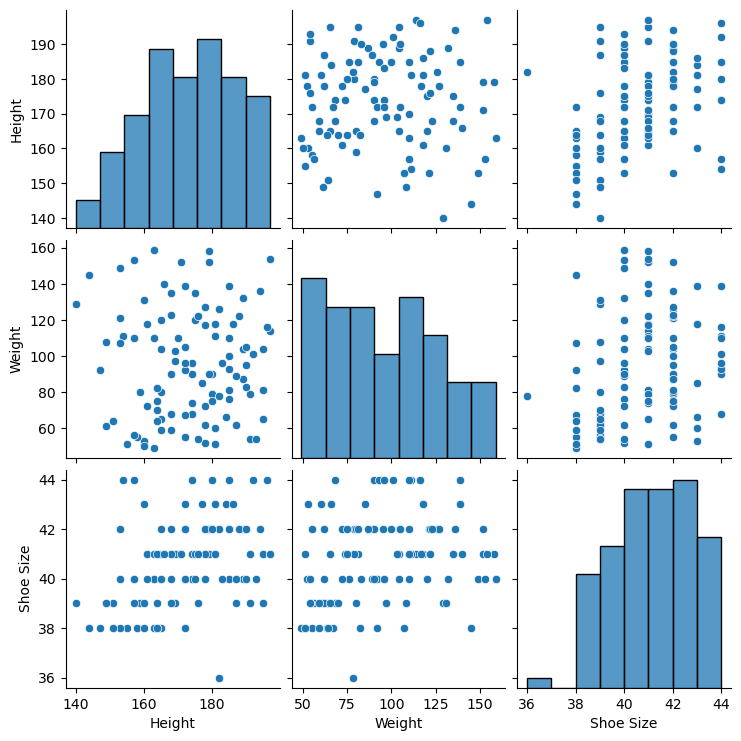

In [22]:
# Finding relationships between variables
sns.pairplot(df)
plt.show()

In [23]:
# Changing the data type of col2 from string to integer
df['Gender'] = df['Gender'].astype(object)

In [25]:
# Find the data type of a single column (e.g., 'Gender')
column_dtype = df['Gender'].dtype

print(f"The data type of the 'Gender' column is: {column_dtype}")

The data type of the 'Gender' column is: object


In [26]:
# Finding gender distribution and count
gender = df['Gender'].value_counts().reset_index(name= 'Count')

In [27]:
gender


,Gender,Count
0,Male,59
1,Female,49


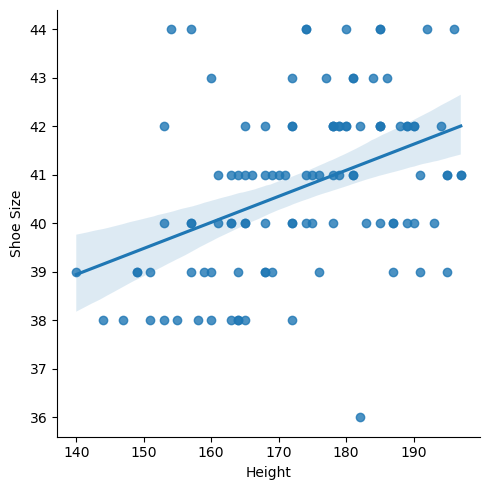

In [28]:
# Creating a linear plot to of height and  show size to further explore their relationship. 
sns.lmplot(x='Height', y='Shoe Size', data = df)

#### The scatterplot illustrates the relationship between height (in centimeters) and shoe size. The data points follow a roughly straight-line path from the lower left to the upper right. It shows a positive linear relationship between the two variables, meaning as height increases, shoe size tends to increase as well. However, there are some points that do not fit well within the general trend. This means that such outliers can influence the slope and intercept of the regression line, especially if they are not representative of the population.



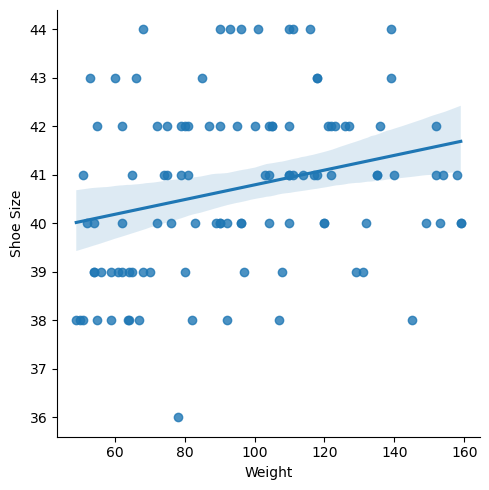

In [29]:
# Creating a linear plot to of height and  show size to further explore their relationship. 
sns.lmplot(x='Weight', y='Shoe Size', data = df)

#### The scatterplot shows the relationship between weight (in kilograms) and shoe size. It displays a positive linear relationship, indicating that as weight increases, shoe size tends to increase. While there is a positive linear relationship between weight and shoe size, the variability and spread suggest that weight alone may not be a perfect predictor of shoe size. The relationship might be influenced by other factors, or a more complex model might be needed to make accurate predictions across all weight ranges.

### 5.3 Feature Selection 

In [30]:
# Removing Features- weight column from the dataset
df = df.drop(['Weight'], axis=1)

In [31]:
df.head()

,Height,Shoe Size,Gender
0,180,42,Male
1,165,41,Male
2,178,42,Male
3,160,43,Male
4,182,36,Male


### 5.4 Feature Encoding

In [32]:
# Encoding Gender column
df['Gender']= df['Gender'].map({'Female': 0, 'Male': 1})

In [33]:
df

,Height,Shoe Size,Gender
0,180,42,1
1,165,41,1
2,178,42,1
3,160,43,1
4,182,36,1
...,...,...,...
104,166,41,0
105,190,42,0
106,186,43,1
107,168,42,1


### 5.5 Train/ Test Split

In [34]:
# Defining Features into groups (X and y)

X = df.drop(columns = ['Shoe Size'])     ## Predictor variables
y = df['Shoe Size']  ## Target variable

print(X.shape)
print(y.shape)

(108, 2)
(108,)


In [35]:
# Importing Model
from sklearn.model_selection import train_test_split

In [36]:
# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state = 42)

## 6. Building Models

In [37]:
# Initialializing Linear Regression Model
from sklearn.linear_model import LinearRegression

In [38]:
# Create an instance of Linear Regression model
lr = LinearRegression()

In [39]:
# Fit the model to the training sets
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
# Making prediction on the testing
y_pred = lr.predict(X_test)

### 6.1 Model Evaluation

In [42]:
# Initializing metric evaluation libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
# Evaluating models
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [47]:
# Printing out the results
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 1.3609699814287721
MSE: 3.757433079208296
RMSE: 1.938409935800035
R2: 0.013775699383505757


### Interpretation of the evaluation metric results


#### 1. The Mean Absolute Error (MAE) measures the average magnitude of errors in a prediction set, regardless of their direction. It is computed by averaging the absolute differences between predicted and actual values. An MAE of 1.361 means that, on average, the model's predictions deviate from the actual values by approximately 1.361 units.
#### 2. The Mean Squared Error (MSE) is calculated by averaging the squared differences between predicted and actual values. By squaring the errors, MSE gives more weight to larger discrepancies, making it more sensitive to significant errors compared to MAE. An MSE of 3.757 indicates a relatively higher variance in the errors.
#### 3. The RMSE, which is the square root of the MSE, serves as an error metric expressed in the same units as the target variable, thus enhancing its interpretability compared to MSE. For instance, an RMSE of 1.938 signifies that the average prediction error is approximately 1.938 units
#### 4. The Root Mean Squared Error (RMSE), which is the square root of the MSE, provides an error metric in the same units as the target variable, improving interpretability. For example, an RMSE of 1.938 signifies that the average prediction error is approximately 1.938 units.


### 7.1 Recommendations

#### 1.	You can consider improving the model by adding more features to better capture the relationships and trying out more advance models like polynomial regression, decision trees, or ensemble models to improve performance.
#### 2.	You can conduct an error analysis to investigate large errors particularly to understand where the model fails including addressing data issues. Also, it is important to examine error patterns to further refine the preprocessing of data and model.
#### 3.	You must enhance data quality ensuring data is clean and representative of the population and if possible, include data volume to improve model learning and generalization. 
#### 4.	Use cross- validation to ensure metrics are robust across different sets.
#### 5.	You can consider applying model calibration such as applying techniques like Lasso or Ridge regression to prevent overfitting and you can also apply hyperparameter tuning to find the best model configuration. 
